In [1]:
import pandas as pd
import numpy as np

### SIMPLE RECOMMENDATION ENGINE WITH 2 NGRAMS FOR DESCRIPTION

In [5]:
train = pd.read_csv('./data/original/properties_colombia_train.csv', sep = ',')
train.drop('id', axis=1, inplace=True)
train.rename(columns={'Unnamed: 0':'id'}, inplace=True)
train.set_index('id', inplace=True)

In [6]:
train['target'] = np.where(train['price'] > train['price'].mean(), 1, 0)
train = train[['title', 'description', 'target']]

train['target'].fillna(0, inplace=True)
train['description'].fillna(' ', inplace=True)
train['title'].fillna(' ', inplace=True)

In [2]:
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

In [72]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Create CountVectorizer object
vectorizer = CountVectorizer(strip_accents='ascii', stop_words=stopwords, lowercase=False, ngram_range=(1,2))
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train['description'], train['target'], test_size=0.2,stratify=train['target'], random_state = 1234)

# Generate training Bow vectors
X_train_bow = vectorizer.fit_transform(X_train)
# Generate test BoW vectors
X_test_bow = vectorizer.transform(X_test)

# Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
# Create MultinomialNB object
clf = MultinomialNB()
# Train clf
clf.fit(X_train_bow, y_train)
# Compute accuracy on test set
accuracy = clf.score(X_test_bow, y_test)

print("The accuracy of the classifier on the test set is %.3f" % accuracy)

/Users/maico/Henry/DeepLearning/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:394: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'teni

MultinomialNB()

The accuracy of the classifier on the test set is 0.900


In [7]:
test = pd.read_csv('./data/original/properties_colombia_test.csv', sep = ',')
test.drop('id', axis=1, inplace=True)
test.rename(columns={'Unnamed: 0':'id'}, inplace=True)
test.set_index('id', inplace=True)
test = test[['title', 'description']]
test['description'].fillna(' ', inplace=True)
test['title'].fillna(' ', inplace=True)

In [80]:
# Predict the sentiment of a expensive sale
review1 = test['description'].sample().values
prediction = clf.predict(vectorizer.transform([str(review1)]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))
review1

The sentiment predicted by the classifier is 0


array(['OPORTUNIDAD| CASA LOTE EN VENTA Consta de. Sala comedor| cocina convencional| baño| patio. Opción de construir a gusto| terreno ideal  para uso comercial o bodega.Entorno Relevante. Centro comercial Centro Suba| Cai de Aures| D1| cerca a  vía principal| Parque Gloria Lara| Colegios cercanos.Barrios Colindantes. La Estanzuela| Aures| El Rosal| Lagos de Suba| San Jorge.'],
      dtype=object)

In [81]:
# Predict the sentiment of a expensive sale
review2 = test['description'].sample().values
prediction = clf.predict(vectorizer.transform([str(review2)]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))
review2

The sentiment predicted by the classifier is 1


array(['Hermosa Casa en Venta, diseñada y ubicada estratégicamente dentro de un lote de 1.303mt2, construcción de estilo rustico de un piso  mas guardilla que tiene salida a terraza superior, área construida de 150mt2. Tiene tres alcobas, la principal con baño, vestier y salida a una de las tres  terrazas que tiene esta acogedora casa. Cocina integral abierta, sala y comedor con con salida a otra terraza y zona de asados. Amplia e iluminada su diseño permite conexión constante con la naturaleza por sus amplios ventanales con vista a las montañas y a sus zonas verdes con arboles frutales, lote tiene pozo de agua, garaje hasta para 4 vehículos y deposito. El condominio tiene club house, cancha de tenis, microfútbol y cancha múltiple, piscina, jacuzzi, senderos ecológicos, 6 lagos y bosque nativo. Tan solo a 4 minutos de la 14 de alfaguara y 15min de Cali. !Ven y conoce tu próximo hogar!'],
      dtype=object)

In [86]:
test.shape[0]

65850

In [94]:
predictions = []
for i in range(test.shape[0]):
    prediction = clf.predict(vectorizer.transform([str(test.iloc[i,1])]))[0]
    predictions.append(prediction)

len(predictions)

65850

In [97]:
df = pd.DataFrame(predictions, columns=['target'])
df.to_csv('./data/predictions/predictions_nlp_recommendation.csv', index=False)

### ADVANCED NLP WITH SPACY

In [8]:
from functions import *
train = trim_all_columns(train)
train['title'] = normalize_column(train, 'title')
train['description'] = normalize_column(train, 'description')
train['title'] = train['title'].str.lower().str.strip()
train['description'] = train['description'].str.lower().str.strip()
pattern = '|'.join(['\n','\r', '\t' ,'\xa0','\u200b',','])
train['title'] = clean_values(train['title'], pattern, value=' ')
train['description'] = clean_values(train['description'], pattern, value=' ')
pattern2 = '|'.join(['_', '[(|)]', '-',':',';'])
train['title'] = clean_values(train['title'], pattern2, regex = True, value=' ')
train['description'] = clean_values(train['description'], pattern2, regex = True, value=' ')
train['title'] = clean_values(train['title'], r"\<.*?\>", regex = True, value=' ')
train['description'] = clean_values(train['description'], r"\<.*?\>", regex = True, value=' ')
train['title'] = clean_values(train['title'], r"\{.*?\}", regex = True, value=' ')
train['description'] = clean_values(train['description'], r"\{.*?\}", regex = True, value=' ')
train['title'] = train['title'].str.replace(' +',' ', regex=True)
train['description'] = train['description'].str.replace(' +',' ', regex = True)


In [196]:
train['description'][861131]

" b hermosa mansion en el poblado area construida 900m2 /b br br hermosa mansi&oacute n en el poblado br / br / 2 niveles y s&oacute tano br / br / 1er niver br / sal&oacute n br / comedor br / cocina abierta con isla br / deck abierto con piscina infinita con vista a la ciudad br / jacuzzi br / zona bbq br / gimnasio br / zona de ropas br / alacena br / parqueadero cubierto para 6 carros br / cuarto &uacute til externo br / br / 2do nivel br / br / 3 habitaciones con ba&ntilde o y vestier br / jacuzzi br / balc&oacute n br / sala de cine br / biblioteca br / br / tiene adicional cancha de microfutbol en grama natura br / tiene cine privado dentro de la mansi&oacute n br / br / sotano br / espacio multiple para juegos de mesa br / habitaciones adicionales br / ba&ntilde o br / instalaciones de acueducto br / energ&iacute a suficiente br / br / sus alrededores est&aacute n dotadas de un bonito jard&iacute n br / huerta casera br / perrera br / br / &aacute rea total 2 154m2 br / &aacute

In [9]:
# Import spacy
import spacy
# Para instalar modulos: https://spacy.io/usage/models

# Instantiate the English model: nlp
nlp = spacy.load('es_core_news_lg')

In [10]:
# Create a new document: doc
#doc = nlp(train['description'][861131])
doc = nlp(train['description'].sample(random_state=113).values[0])

In [11]:
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print('{:<12}{:<10}{:<10}'.format(token_text, token_pos, token_dep))

codigo      ADJ       ROOT      
inmueble    PROPN     appos     
1937        NOUN      appos     
apartamento NOUN      amod      
con         ADP       case      
3           NUM       nummod    
alcobas     PROPN     nmod      
3           NUM       appos     
closet      PROPN     appos     
1           NUM       nummod    
vestier     ADJ       compound  
sala        NOUN      flat      
comedor     ADJ       amod      
cocina      PROPN     flat      
integral    ADJ       amod      
2           NUM       compound  
banos       NOUN      flat      
cabinados   ADJ       amod      
zona        NOUN      appos     
de          ADP       case      
ropas       NOUN      nmod      
red         NOUN      flat      
de          ADP       case      
gas         NOUN      nmod      
calentador  ADJ       amod      
a           ADP       case      
gas         NOUN      nmod      
parqueadero NOUN      amod      
doble       ADJ       amod      
cubierto    ADJ       amod      
mirador   

In [12]:
from __future__ import unicode_literals
from collections import Counter
contador = Counter(([token.pos_ for token in doc]))
print('Adjetivos:', contador['ADJ'], ', Sustantivos: ', contador['NOUN'])

Adjetivos: 10 , Sustantivos:  13


In [13]:
# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

In [18]:
# Create a new document: doc
#doc = nlp(train['description'][861131])
text = train['description'].sample().values[0]
print(text)
doc = nlp(text)

 edificio el prado 34 barrio el prado bucaramanga estrato 4 area del apartamento 75m2 habitaciones 2 banos 2 cocina integral parqueadero si escriturado paquete primium por constructora pisos en porcelanato griferia corona muebles de bano corona banos con vidrio templado cocina isla con campana estractora zona social piscina adultos piscina ninos salon social juegos infantiles gimnasio salon de juegos parqueadero visitantes vigilancia 24 horas informacion financiera administracion 150 000 precio de venta 230millones informacion de contacto alejandra torres 


In [19]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [
    {'POS': 'NUM', 'DEP': 'nummod'},
    #{'TEXT': 'nivel', 'OP': '!'},
    #{'TEXT': 'niver', 'OP': '!'},
    {'POS': 'NOUN', 'OP': '?'},
    {'POS':'PROPN', 'OP':'+'},
    #{'DEP': 'ROOT', 'OP': '!'},
    #{'DEP': 'PUNCT', 'OP': '!'},
    

]

matcher.add('Number_Things', [pattern])

matches = matcher(doc) #Gives you and index unique ID, start and end of the match

for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

4 area
2 banos
24 horas informacion


In [226]:
hola = []
omit = ['m2', 'metro', 'nive']
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    for i in omit:
        try:
            matched_span.text.index(i)
        except:
            hola.append(matched_span.text)
            break
hola

['tres alcobas', 'tres alcobas dos']

NOW LET'S ITERATE OVER ENTIRE TRAIN SET TO EXTRACT ALL THESE FEATURES

In [146]:
train.iloc[1,1]

'Venta apartamento en piso 16 con vista exterior. Tiempo de construido 2 años. Area 122 m2 distribuidos de la siguiente manera: tres habitaciones, sala comedor, cocina tipo americana, dos baños. Dos parqueaderos privados, un deposito. El conjunto cuenta con seguridad las veinticuatro horas, GYM, salon comunal, piscina, billar, mesa de ping pong, cancha de fooball. El apartamento de tus sueños lo acabas de encontrar. Llamenos para tener el privilegio de atenderlos. Gracias \n'

In [228]:
train.columns

Index(['title', 'description', 'target', 'objetos'], dtype='object')

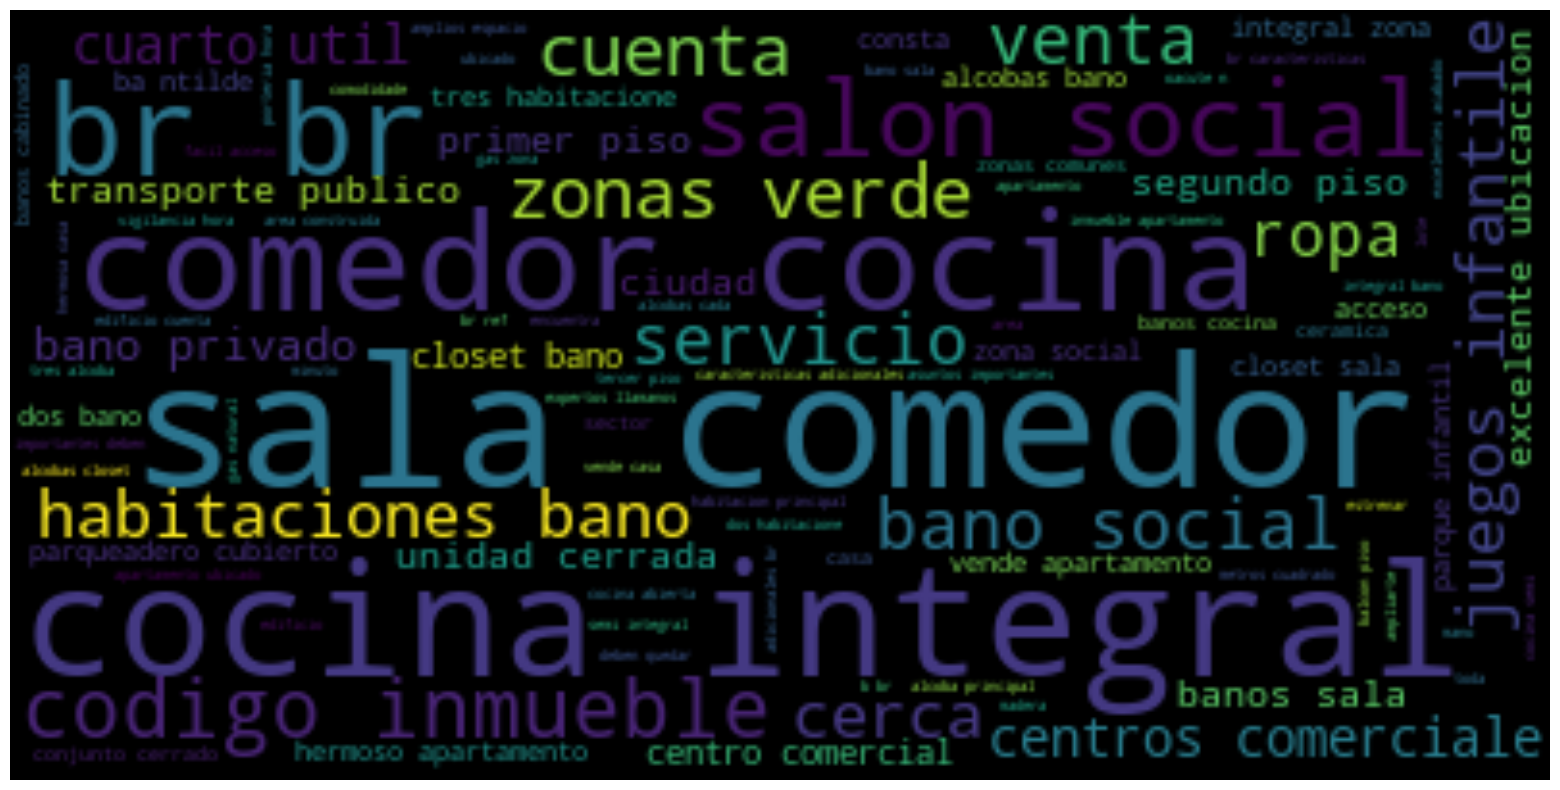

In [21]:
#### WORDCLOUD
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
import matplotlib.pyplot as plt

description_plain_text = train['description'].str.cat(sep=' ')
cloud_prueba = WordCloud(stopwords = stopwords).generate(description_plain_text)
plt.figure(figsize=(20,10))
plt.imshow(cloud_prueba, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
accept = list(cloud_prueba.words_.keys())
accept


['sala comedor',
 'cocina integral',
 'comedor cocina',
 'br br',
 'salon social',
 'codigo inmueble',
 'cuenta',
 'zonas verde',
 'bano social',
 'servicio',
 'venta',
 'cerca',
 'juegos infantile',
 'habitaciones bano',
 'ropa',
 'centros comerciale',
 'cuarto util',
 'bano privado',
 'transporte publico',
 'segundo piso',
 'ciudad',
 'excelente ubicacion',
 'primer piso',
 'banos sala',
 'unidad cerrada',
 'centro comercial',
 'closet bano',
 'parqueadero cubierto',
 'acceso',
 'integral zona',
 'vende apartamento',
 'zona social',
 'alcobas bano',
 'closet sala',
 'consta',
 'hermoso apartamento',
 'tres habitacione',
 'ba ntilde',
 'parque infantil',
 'dos bano',
 'conjunto cerrado',
 'banos cocina',
 'zonas comunes',
 'ceramica',
 'sector',
 'casa',
 'banos cabinado',
 'habitacion principal',
 'oacute n',
 'edificio',
 'br ref',
 'lote',
 'amplios espacio',
 'hermosa casa',
 'gas zona',
 'vigilancia hora',
 'metros cuadrado',
 'b br',
 'br caracteristicas',
 'caracteristicas adic

In [ ]:
[x for x in accept if not x.startswith('@$\t') and not x.startswith('#')]
['this doesnt', 'this shouldnt', 'this isnt', 'this musnt']

In [283]:
all_items = []
omit = ['m2', 'metro', 'nive', 'mts2', 'mts', 'mt2']
accept = ['bano', 'baño', 'habitacion', 'alcoba','gym','gimnas','cuarto','living','atico','recamara', 'parrilla', ]
for i in range(10):
    doc = nlp(train.iloc[i,1])
    matches = matcher(doc)
    temp = []
    for match_id, start, end in matches:
    # Get the matched span
        matched_span = doc[start:end]
        for i in omit:
            try:
                x = matched_span.text.index(i)
            except:
                temp.append(matched_span.text)
                break
    temp = [text for text in temp if not any(k in text for k in omit) and any (k in text for k in accept)]
    all_items.append(temp)

all_items

[[],
 ['2 anos area',
  '2 anos area 122',
  'dos banos dos',
  'veinticuatro horas gym salon',
  'veinticuatro horas gym salon comunal'],
 [],
 [],
 ['24 horas juegos infantiles'],
 [],
 [],
 [],
 [],
 ['3 banos terraza']]

In [277]:
list1 = ['3 habitaciones', '3 habitaciones 3', '3 banos']
list2 = [text for text in list1 if not any(k in text for k in ['bano'])]
list2

['3 habitaciones', '3 habitaciones 3']

In [152]:
train.loc[861131,'objetos']

'2 Niveles y ,1er Niver< ,1er Niver<br ,6 carros<br ,2do Nivel< ,2do Nivel<br ,3 Habitaciones con'

In [ ]:
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    for i in omit:
        try:
            matched_span.text.index(i)
        except:
            hola.append(matched_span.text)
            break

train['objetos'] = ''
for i in range(10):
    doc = nlp(train.iloc[i,1])
    matches = matcher(doc)
    temp = []
    for match_id, start, end in matches:
        # Get the matched span
        matched_span = doc[start:end]
        matched_span.text
        temp.append(matched_span.text)
    train.iloc[i,3] = ' ,'.join(temp)

# NEURAL NETWORK WITH SPACY

In [ ]:
import pandas as pd
import numpy as np
from spacy import displacy
from spacy.util import minibatch, compounding
import spacy
# Para instalar modulos: https://spacy.io/usage/models
nlp = spacy.load('es_core_news_lg')
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
train['tuples'] = train.apply(
    lambda row: (row['description'],row['target']), axis=1)
train_n = train['tuples'].tolist()
train_n[:1]

[(" b hermosa mansion en el poblado area construida 900m2 /b br br hermosa mansi&oacute n en el poblado br / br / 2 niveles y s&oacute tano br / br / 1er niver br / sal&oacute n br / comedor br / cocina abierta con isla br / deck abierto con piscina infinita con vista a la ciudad br / jacuzzi br / zona bbq br / gimnasio br / zona de ropas br / alacena br / parqueadero cubierto para 6 carros br / cuarto &uacute til externo br / br / 2do nivel br / br / 3 habitaciones con ba&ntilde o y vestier br / jacuzzi br / balc&oacute n br / sala de cine br / biblioteca br / br / tiene adicional cancha de microfutbol en grama natura br / tiene cine privado dentro de la mansi&oacute n br / br / sotano br / espacio multiple para juegos de mesa br / habitaciones adicionales br / ba&ntilde o br / instalaciones de acueducto br / energ&iacute a suficiente br / br / sus alrededores est&aacute n dotadas de un bonito jard&iacute n br / huerta casera br / perrera br / br / &aacute rea total 2 154m2 br / &aacu

In [ ]:
#functions from spacy documentation
def load_data(limit=0, split=0.8):
    train_data = train
    np.random.shuffle(train_data)
    train_data = train_data[-limit:]
    texts, labels = zip(*train_data)
    cats = [{'POSITIVE': bool(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])

def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 1e-8  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 1e-8  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall) / (precision + recall)
    return {'textcat_p': precision, 'textcat_r': recall, 'textcat_f': f_score}

#("Number of texts to train from","t" , int)
n_texts=30000
#You can increase texts count if you have more computational power.

#("Number of training iterations", "n", int))
n_iter=10

In [ ]:
# add the text classifier to the pipeline if it doesn't exist
# nlp.create_pipe works for built-ins that are registered with spaCy
if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe('textcat')
    nlp.add_pipe(textcat, last=True)
# otherwise, get it, so we can add labels to it
else:
    textcat = nlp.get_pipe('textcat')

# add label to text classifier
textcat.add_label('POSITIVE')

# load the dataset
print("Loading food reviews data...")
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)
print("Using {} examples ({} training, {} evaluation)"
      .format(n_texts, len(train_texts), len(dev_texts)))
train_data = list(zip(train_texts,
                      [{'cats': cats} for cats in train_cats]))

In [ ]:
# get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()
    print("Training the model...")
    print('{:^5}\t{:^5}\t{:^5}\t{:^5}'.format('LOSS', 'P', 'R', 'F'))
    for i in range(n_iter):
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(train_data, size=compounding(4., 32., 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2,
                       losses=losses)
        with textcat.model.use_params(optimizer.averages):
            # evaluate on the dev data split off in load_data()
            scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
        print('{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}'  # print a simple table
              .format(losses['textcat'], scores['textcat_p'],
                      scores['textcat_r'], scores['textcat_f']))